In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import urllib
import bs4
import pandas
from urllib import request
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

# Droit des femmes et développement économique

# Importation et traitement de la base de la Banque mondiale

In [2]:
df_bm=pd.read_csv('WDIData.csv')
df_bm.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_bm2=df_bm[["Country Code", "Country Name", "Indicator Name", "Indicator Code", "2019"]]
df_bm2.head(5)

,Country Code,Country Name,Indicator Name,Indicator Code,2019
0,AFE,Africa Eastern and Southern,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN
1,AFE,Africa Eastern and Southern,Access to electricity (% of population),EG.ELC.ACCS.ZS,43.640661
2,AFE,Africa Eastern and Southern,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,28.841150
3,AFE,Africa Eastern and Southern,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,73.589886
4,AFE,Africa Eastern and Southern,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN


# Importation et traitement de la base de l'OCDE

In [4]:
df_ocde=pd.read_csv('./oecd3.csv', sep=',', encoding='latin-1')
df_ocde.head(5)

,"ï»¿""REGION""",RÃ©gion,LOCATION,Pays,INC,Revenu,VAR,Variable,TIME,AnnÃ©e,Value,Flag Codes,Flags
0,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_LAW,Loi,2019,2019,0.50,NaN,NaN
1,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_ATT,Attitudes,2019,2019,21.10,NaN,NaN
2,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_PRACT,Pratique,2019,2019,1.82,NaN,NaN
3,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_DV_LAW,Loi,2019,2019,0.00,NaN,NaN
4,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_IN_LAW,Loi,2019,2019,0.00,NaN,NaN


In [5]:
# on ne sélectionne que les lignes 'pratique' qui correspondent à la réalité des faits 
df_ocde2=df_ocde[df_ocde['Variable']=="Pratique"]
df_ocde2.rename(columns={'ï»¿"REGION"': 'region_monde', 'RÃ©gion': 'region', 'LOCATION': 'Country Code', 'Pays':'Country Name'}, inplace=True)
df_ocde2=df_ocde2[df_ocde2['region_monde']=="ALL"]
df_ocde2.head(5)

C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,region_monde,region,Country Code,Country Name,INC,Revenu,VAR,Variable,TIME,AnnÃ©e,Value,Flag Codes,Flags
29,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,DF_HR_PRACT,Pratique,2019,2019,1.82,NaN,NaN
34,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_VAW_PRACT,Pratique,2019,2019,16.90,NaN,NaN
36,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_MW_PRACT,Pratique,2019,2019,105.50,NaN,NaN
38,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_RA_PRACT,Pratique,2019,2019,11.00,NaN,NaN
42,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RAPFR_SAFS_PRACT,Pratique,2019,2019,50.00,NaN,NaN


In [6]:
# on ne sélectionne que les colonnes qui nous intéressent 
df_ocde3=df_ocde2[['Country Code', 'Country Name', 'VAR', 'Value']]
df_ocde3.head(5)

,Country Code,Country Name,VAR,Value
29,AUS,Australie,DF_HR_PRACT,1.82
34,AUS,Australie,RPI_VAW_PRACT,16.90
36,AUS,Australie,RPI_MW_PRACT,105.50
38,AUS,Australie,RPI_RA_PRACT,11.00
42,AUS,Australie,RAPFR_SAFS_PRACT,50.00


In [7]:
df_ocde3.shape

(3426, 4)

# Création de la base de données

## Indicateur famille (F)

Scrapper le taux de fertilité


In [8]:
df_taux_fertilité=pd.read_csv('data_natalité.csv')
df_taux_fertilité.head(5)

,Country Name,Fertility Rate In 2019 (Births/Woman)
0,Niger,6.824
1,Somalia,5.978
2,DR Congo,5.819
3,Mali,5.785
4,Chad,5.649


## PIB

In [38]:
df_pib=df_bm2[df_bm2['Indicator Name']=="GDP per capita (constant 2015 US$)"]
df_pib=df_pib[["Country Name","2019"]]
df_pib.rename(columns={'2019': 'GDP per capita 2019'}, inplace=True)
df_pib

,Country Name,GDP per capita 2019
469,Africa Eastern and Southern,1499.256275
1912,Africa Western and Central,1843.558468
3355,Arab World,6206.570758
4798,Caribbean small states,10050.327615
6241,Central Europe and the Baltics,14823.026908
...,...,...
377092,Virgin Islands (U.S.),NaN
378535,West Bank and Gaza,3378.434621
379978,"Yemen, Rep.",NaN
381421,Zambia,1348.743220


## Indicateur santé (S)

Trois variables:
- Espérance de vie à la naissance pour les femmes (BM)
- Part des femmes non-enceintes anémiées (BM)
- Part des femmes séropositives (BM)

In [9]:
df_esperance_de_vie= df_bm2[df_bm2['Indicator Code']=="SP.DYN.LE00.FE.IN"]
df_esperance_de_vie=df_esperance_de_vie[["Country Name","2019"]]
df_esperance_de_vie.rename(columns={'2019': 'Life expectancy of women at birth'}, inplace=True)
df_esperance_de_vie.head(5)

,Country Name,Life expectancy of women at birth
693,Africa Eastern and Southern,66.202116
2136,Africa Western and Central,59.231072
3579,Arab World,73.832314
5022,Caribbean small states,76.032605
6465,Central Europe and the Baltics,80.833612


In [10]:
df_anemia= df_bm2[df_bm2['Indicator Code']=="SH.ANM.NPRG.ZS"]
df_anemia=df_anemia[["Country Name", "2019"]]
df_anemia.rename(columns={'2019': 'Prevalence of anemia among non pregnant women'}, inplace=True)
df_anemia.head(5)

,Country Name,Prevalence of anemia among non pregnant women
1087,Africa Eastern and Southern,33.432299
2530,Africa Western and Central,50.511312
3973,Arab World,33.212609
5416,Caribbean small states,20.080555
6859,Central Europe and the Baltics,NaN


In [11]:
df_hiv= df_bm2[df_bm2['Indicator Code']=="SH.DYN.AIDS.FE.ZS"]
df_hiv=df_hiv[["Country Name", "2019"]]
df_hiv.rename(columns={'2019': 'Women share of population living with HIV'}, inplace=True)
df_hiv.head(5)

,Country Name,Women share of population living with HIV
1441,Africa Eastern and Southern,60.062444
2884,Africa Western and Central,61.990050
4327,Arab World,40.461413
5770,Caribbean small states,49.739577
7213,Central Europe and the Baltics,NaN


In [75]:
# On fusionne tout ça dans le df santé
df_sante=df_esperance_de_vie.merge(df_anemia, on='Country Name', how='left')
df_sante=df_sante.merge(df_hiv, on='Country Name', how='outer')
df_sante

,Country Name,Life expectancy of women at birth,Prevalence of anemia among non pregnant women,Women share of population living with HIV
0,Africa Eastern and Southern,66.202116,33.432299,60.062444
1,Africa Western and Central,59.231072,50.511312,61.990050
2,Arab World,73.832314,33.212609,40.461413
3,Caribbean small states,76.032605,20.080555,49.739577
4,Central Europe and the Baltics,80.833612,NaN,NaN
...,...,...,...,...
261,Virgin Islands (U.S.),83.100000,NaN,NaN
262,West Bank and Gaza,75.755000,NaN,NaN
263,"Yemen, Rep.",67.826000,61.800000,37.300000
264,Zambia,66.891000,30.700000,61.500000


### Construction de l'indicateur santé 

In [76]:
df_sante=df_sante.merge(df_pib, on='Country Name', how='outer')
df_sante

,Country Name,Life expectancy of women at birth,Prevalence of anemia among non pregnant women,Women share of population living with HIV,GDP per capita 2019
0,Africa Eastern and Southern,66.202116,33.432299,60.062444,1499.256275
1,Africa Western and Central,59.231072,50.511312,61.990050,1843.558468
2,Arab World,73.832314,33.212609,40.461413,6206.570758
3,Caribbean small states,76.032605,20.080555,49.739577,10050.327615
4,Central Europe and the Baltics,80.833612,NaN,NaN,14823.026908
...,...,...,...,...,...
261,Virgin Islands (U.S.),83.100000,NaN,NaN,NaN
262,West Bank and Gaza,75.755000,NaN,NaN,3378.434621
263,"Yemen, Rep.",67.826000,61.800000,37.300000,NaN
264,Zambia,66.891000,30.700000,61.500000,1348.743220


In [77]:
index_with_nan = df_sante.index[df_sante.isnull().any(axis=1)]
index_with_nan.shape
df_sante.drop(index_with_nan,0, inplace=True)

X = df_sante[["Life expectancy of women at birth", "Prevalence of anemia among non pregnant women", "Women share of population living with HIV"]]
X = sm.add_constant(X) # une autre façon d'ajouter une constante 
y = df_sante["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.406
Model:                             OLS   Adj. R-squared:                  0.394
Method:                  Least Squares   F-statistic:                     34.37
Date:                 Mon, 27 Dec 2021   Prob (F-statistic):           5.43e-17
Time:                         15:48:50   Log-Likelihood:                -1688.4
No. Observations:                  155   AIC:                             3385.
Df Residuals:                      151   BIC:                             3397.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

Ne sont pris en compte ici que 155 observations, correspondants aux pays sans nan sur toute une ligne. Les résultats sont donc approximatifs pour l'ensemble de l'échantillon, constitué de 266 pays. Je décide de donner un poids différent aux variables dans la construction de mon indicateur, s'appuyant sur la significativité pratique et statistique de ces indicateurs. 
- l'espérance de vie à la naissance semble très significative et explicative. Je lui confère 3/4 de l'explication de l'indicateur
- la prévalence de l'anémie parmi les femmes pas enceintes: 2/12
- la part de femmes vivant avec le VIH: 1/12

In [85]:
df_sante2=df_sante

In [86]:
df_sante2["Share of np women living without anemia"]=100-df_sante2["Prevalence of anemia among non pregnant women"]
df_sante2["Share of np women living without HIV"]=100-df_sante2["Women share of population living with HIV"]

In [87]:
df_sante2["Share of np women living without anemia indicator"]=df_sante2["Share of np women living without anemia"]/df_sante2["Share of np women living without anemia"].max()
df_sante2["Share of np women living without HIV indicator"]=df_sante2["Share of np women living without HIV"]/df_sante2["Share of np women living without HIV"].max()
df_sante2["Life expectancy of women at birth indicator"]=df_sante2["Life expectancy of women at birth"]/df_sante2["Life expectancy of women at birth"].max()

In [81]:
df_sante2["Indicateur sante"]= 3/4 *df_sante2["Life expectancy of women at birth indicator"]+ 2/12*df_sante2["Share of np women living without anemia indicator"] + 1/12*df_sante2["Share of np women living without HIV indicator"]

In [83]:
df_sante2=df_sante2[["Country Name", "Indicateur sante"]]
df_sante2

,Country Name,Indicateur sante
0,Africa Eastern and Southern,0.722549
1,Africa Western and Central,0.630443
2,Arab World,0.805796
3,Caribbean small states,0.839958
9,Euro area,0.947771
...,...,...
256,Uruguay,0.901667
257,Uzbekistan,0.825082
260,Vietnam,0.884637
264,Zambia,0.732077


Ici, je viens de faire l'indicateur pour les pays sans nan. On laisse comme ça ou on essaie de créer une méthode pour prendre les nan aussi en compte? 

## Indicateur ressources économiques (RE)

Trois variables:
- part des femmes proprétaires d'un compte en banque (OCDE)
- partage des tâches domestiques (OCDE)
- variable pour mesurer les écarts de salaire avec les hommes 

In [13]:
df_domestique=df_ocde3[df_ocde3['VAR']=="DF_HR_PRACT"]
df_domestique=df_domestique[['Country Name', "Value"]]
df_domestique.rename(columns={'Value': 'Domestic time ratio women on men'}, inplace=True)
df_domestique.head(5)

,Country Name,Domestic time ratio women on men
29,Australie,1.82
83,Autriche,1.95
137,Belgique,1.55
192,Canada,1.51
299,Danemark,1.39


In [14]:
df_banque=df_ocde3[df_ocde3['VAR']=="RAPFR_SAFS_PRACT"]
df_banque=df_banque[['Country Name', "Value"]]
df_banque.rename(columns={'Value': 'Women s share amoung bank account owners'}, inplace=True)
df_banque.head(5)

,Country Name,Women s share amoung bank account owners
42,Australie,50.0
97,Autriche,51.1
151,Belgique,50.8
206,Canada,50.4
259,RÃ©publique tchÃ¨que,47.8


In [15]:
# On fusionne tout ça dans le df ressources économiques
df_ressources_eco=df_domestique.merge(df_banque, on='Country Name', how='outer')
df_ressources_eco = df_ressources_eco.drop_duplicates()
df_ressources_eco

,Country Name,Domestic time ratio women on men,Women s share amoung bank account owners
0,Australie,1.82,50.0
4,Autriche,1.95,51.1
8,Belgique,1.55,50.8
12,Canada,1.51,50.4
16,Danemark,1.39,50.3
...,...,...,...
498,Somalie,NaN,38.7
500,Tadjikistan,NaN,44.5
502,Togo,NaN,42.1
504,YÃ©men,NaN,12.6


## Indicateur éducation (E)

4 variables : 
- Adolescents out of school, female (% of female lower secondary school age) (BM)
- Adjusted net enrollment rate, primary, female (% of primary school age children) (à comparer avec les hommes) (BM)
- Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative) (à comparer avec les hommes) (BM)
- Educational attainment, at least completed short-cycle tertiary, population 25+, female (%) (cumulative) (à comparer avec les hommes) (BM)

In [16]:
df_descolariation = df_bm2[df_bm2['Indicator Code']=="SE.SEC.UNER.LO.FE.ZS"]
df_descolariation = df_descolariation[["Country Name", "2019"]]
df_descolariation.rename(columns={'2019': 'Adolescents s share out of school, female' }, inplace=True)
df_descolariation.head(5)

,Country Name,"Adolescents s share out of school, female"
50,Africa Eastern and Southern,NaN
1493,Africa Western and Central,NaN
2936,Arab World,18.380989
4379,Caribbean small states,11.200680
5822,Central Europe and the Baltics,5.755160


In [17]:
df_scolariation_primaire = 

SyntaxError: invalid syntax (<ipython-input-17-c90a61e2bc38>, line 1)

In [18]:
df_education_basique = df_bm2[df_bm2['Indicator Code']=="SE.SEC.CUAT.LO.FE.ZS"]
df_education_basique = df_education_basique[["Country Name", "2019"]]
df_education_basique.rename(columns={'2019': 'Women of 25+ who completed lower secondary'}, inplace=True)
df_education_basique.head(5)

,Country Name,Women of 25+ who completed lower secondary
324,Africa Eastern and Southern,NaN
1767,Africa Western and Central,NaN
3210,Arab World,NaN
4653,Caribbean small states,NaN
6096,Central Europe and the Baltics,NaN


In [19]:
df_etude_sup = df_bm2[df_bm2['Indicator Code']=="SE.TER.CUAT.ST.FE.ZS"]
df_etude_sup = df_etude_sup[["Country Name", "2019"]]
df_etude_sup.rename(columns={'2019': 'Women of 25+ who completed short-cycle tertiary'}, inplace=True)
df_etude_sup.head(5)

,Country Name,Women of 25+ who completed short-cycle tertiary
333,Africa Eastern and Southern,NaN
1776,Africa Western and Central,NaN
3219,Arab World,NaN
4662,Caribbean small states,NaN
6105,Central Europe and the Baltics,NaN


## Indicateur autonomie du corps (AC)

In [89]:
df_contraception=df_ocde3[df_ocde3['VAR']=="RPI_RA_PRACT"]
df_contraception=df_contraception[['Country Name','Country Code', "Value"]]
df_contraception.rename(columns={'Value': 'No contraception used without wanting having children'}, inplace=True)
df_contraception.head(5)

,Country Name,Country Code,No contraception used without wanting having children
38,Australie,AUS,11.0
92,Autriche,AUT,10.0
146,Belgique,BEL,7.0
201,Canada,CAN,7.0
254,RÃ©publique tchÃ¨que,CZE,4.3


In [90]:
df_violences=df_ocde3[df_ocde3['VAR']=="RPI_VAW_PRACT"]
df_violences=df_violences[['Country Name','Country Code', "Value"]]
df_violences.rename(columns={'Value': 'Physical and sexual violences on women'}, inplace=True)
df_violences.head(5)

,Country Name,Country Code,Physical and sexual violences on women
34,Australie,AUS,16.9
88,Autriche,AUT,13.0
142,Belgique,BEL,24.0
197,Canada,CAN,1.9
250,RÃ©publique tchÃ¨que,CZE,21.0


In [92]:
# Provient de la banque mondiale 2018 
df_bm3=df_bm[["Country Code", "Country Name", "Indicator Name", "Indicator Code", "2018"]]

df_homicide= df_bm3[df_bm3['Indicator Code']=="VC.IHR.PSRC.FE.P5"]
df_homicide=df_homicide[["Country Name","Country Code", "2018"]]
df_homicide.rename(columns={'2018': 'Intentional homicides per 100,000 female'}, inplace=True)
df_homicide.head(5)

,Country Name,Country Code,"Intentional homicides per 100,000 female"
634,Africa Eastern and Southern,AFE,NaN
2077,Africa Western and Central,AFW,NaN
3520,Arab World,ARB,NaN
4963,Caribbean small states,CSS,NaN
6406,Central Europe and the Baltics,CEB,NaN


In [138]:
# On fusionne tout ça dans le df autonomie du corps
df_autonomie_corps=df_contraception.merge(df_violences, on='Country Code', how='outer')
df_autonomie_corps=df_autonomie_corps.merge(df_homicide, on='Country Code', how='outer')
df_autonomie_corps = df_autonomie_corps.drop_duplicates()
df_autonomie_corps=df_autonomie_corps[["Country Name", "Country Code","No contraception used without wanting having children", "Physical and sexual violences on women", "Intentional homicides per 100,000 female" ]]
df_autonomie_corps.head(5)

,Country Name,Country Code,No contraception used without wanting having children,Physical and sexual violences on women,"Intentional homicides per 100,000 female"
0,Australia,AUS,11.0,16.9,0.656064
4,Austria,AUT,10.0,13.0,0.973572
8,Belgium,BEL,7.0,24.0,NaN
12,Canada,CAN,7.0,1.9,NaN
16,Czech Republic,CZE,4.3,21.0,NaN


### Construction de l'indicateur autonomie du corps

In [160]:
df_autonomie_corps2=df_autonomie_corps.merge(df_pib, on='Country Name', how='outer')
df_autonomie_corps2

,Country Name,Country Code,No contraception used without wanting having children,Physical and sexual violences on women,"Intentional homicides per 100,000 female",GDP per capita 2019
0,Australia,AUS,11.0,16.9,0.656064,58923.208212
1,Austria,AUT,10.0,13.0,0.973572,46717.720729
2,Belgium,BEL,7.0,24.0,NaN,42887.655132
3,Canada,CAN,7.0,1.9,NaN,44958.088687
4,Czech Republic,CZE,4.3,21.0,NaN,20202.151592
...,...,...,...,...,...,...
261,Tonga,TON,NaN,NaN,NaN,4652.588587
262,Turks and Caicos Islands,TCA,NaN,NaN,NaN,28693.061321
263,Tuvalu,TUV,NaN,NaN,NaN,3674.354085
264,Vanuatu,VUT,NaN,NaN,NaN,2882.402195


In [161]:
df_autonomie_corps2=df_autonomie_corps2[["Country Name", "Country Code", "No contraception used without wanting having children", "Physical and sexual violences on women", "GDP per capita 2019"]]
df_autonomie_corps2

,Country Name,Country Code,No contraception used without wanting having children,Physical and sexual violences on women,GDP per capita 2019
0,Australia,AUS,11.0,16.9,58923.208212
1,Austria,AUT,10.0,13.0,46717.720729
2,Belgium,BEL,7.0,24.0,42887.655132
3,Canada,CAN,7.0,1.9,44958.088687
4,Czech Republic,CZE,4.3,21.0,20202.151592
...,...,...,...,...,...
261,Tonga,TON,NaN,NaN,4652.588587
262,Turks and Caicos Islands,TCA,NaN,NaN,28693.061321
263,Tuvalu,TUV,NaN,NaN,3674.354085
264,Vanuatu,VUT,NaN,NaN,2882.402195


In [162]:
index_with_nan = df_autonomie_corps2.index[df_autonomie_corps2.isnull().any(axis=1)]
index_with_nan.shape
df_autonomie_corps2.drop(index_with_nan,0, inplace=True)
df_autonomie_corps2

C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country Name,Country Code,No contraception used without wanting having children,Physical and sexual violences on women,GDP per capita 2019
0,Australia,AUS,11.0,16.9,58923.208212
1,Austria,AUT,10.0,13.0,46717.720729
2,Belgium,BEL,7.0,24.0,42887.655132
3,Canada,CAN,7.0,1.9,44958.088687
4,Czech Republic,CZE,4.3,21.0,20202.151592
...,...,...,...,...,...
165,Tajikistan,TJK,22.9,20.3,1174.091716
166,Tanzania,TZA,22.1,41.7,985.448208
167,Togo,TGO,33.6,22.1,630.790510
168,Uganda,UGA,29.6,49.9,898.407515


In [163]:
index_with_nan = df_autonomie_corps2.index[df_autonomie_corps2.isnull().any(axis=1)]
index_with_nan.shape
df_autonomie_corps2.drop(index_with_nan,0, inplace=True)

X = df_autonomie_corps2[["No contraception used without wanting having children", "Physical and sexual violences on women"]]
X = sm.add_constant(X) # une autre façon d'ajouter une constante 
y = df_autonomie_corps2["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.227
Model:                             OLS   Adj. R-squared:                  0.215
Method:                  Least Squares   F-statistic:                     18.77
Date:                 Mon, 27 Dec 2021   Prob (F-statistic):           7.12e-08
Time:                         16:26:32   Log-Likelihood:                -1456.6
No. Observations:                  131   AIC:                             2919.
Df Residuals:                      128   BIC:                             2928.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Ne sont pris en compte ici que 131 observations, correspondants aux pays sans nan sur toute une ligne. Les résultats sont donc approximatifs pour l'ensemble de l'échantillon, constitué de 266 pays. Je décide de donner un poids différent aux variables dans la construction de mon indicateur, s'appuyant sur la significativité pratique et statistique de ces indicateurs. 
- la non utilisation de contraception au sein d'un couple: 2/3
- les violences physiques et sexuelles à l'encontre des femmes: 1/3
Je retire la variable intentional homicides, étant trop peu renseignée (70 valeurs environ)

In [164]:
df_autonomie_corps2["Contraception used without wanting having children"]=100-df_autonomie_corps2["No contraception used without wanting having children"]
df_autonomie_corps2["No physical and sexual violences on women"]=100-df_autonomie_corps2["Physical and sexual violences on women"]

<ipython-input-164-7dacfd3cb900>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autonomie_corps2["Contraception used without wanting having children"]=100-df_autonomie_corps2["No contraception used without wanting having children"]
<ipython-input-164-7dacfd3cb900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autonomie_corps2["No physical and sexual violences on women"]=100-df_autonomie_corps2["Physical and sexual violences on women"]


In [166]:
df_autonomie_corps2["Contraception used without wanting having children indicator"]=df_autonomie_corps2["Contraception used without wanting having children"]/df_autonomie_corps2["Contraception used without wanting having children"].max()
df_autonomie_corps2["No physical and sexual violences on women indicator"]=df_autonomie_corps2["No physical and sexual violences on women"]/df_autonomie_corps2["No physical and sexual violences on women"].max()
df_autonomie_corps2

<ipython-input-166-f8a06908e033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autonomie_corps2["Contraception used without wanting having children indicator"]=df_autonomie_corps2["Contraception used without wanting having children"]/df_autonomie_corps2["Contraception used without wanting having children"].max()
<ipython-input-166-f8a06908e033>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autonomie_corps2["No physical and sexual violences on women indicator"]=df_autonomie_corps2["No physical an

,Country Name,Country Code,No contraception used without wanting having children,Physical and sexual violences on women,GDP per capita 2019,Contraception used without wanting having children,No physical and sexual violences on women,No physical and sexual violences on women indicator,Contraception used without wanting having children indicator
0,Australia,AUS,11.0,16.9,58923.208212,89.0,83.1,0.847095,0.927083
1,Austria,AUT,10.0,13.0,46717.720729,90.0,87.0,0.886850,0.937500
2,Belgium,BEL,7.0,24.0,42887.655132,93.0,76.0,0.774720,0.968750
3,Canada,CAN,7.0,1.9,44958.088687,93.0,98.1,1.000000,0.968750
4,Czech Republic,CZE,4.3,21.0,20202.151592,95.7,79.0,0.805301,0.996875
...,...,...,...,...,...,...,...,...,...
165,Tajikistan,TJK,22.9,20.3,1174.091716,77.1,79.7,0.812436,0.803125
166,Tanzania,TZA,22.1,41.7,985.448208,77.9,58.3,0.594292,0.811458
167,Togo,TGO,33.6,22.1,630.790510,66.4,77.9,0.794088,0.691667
168,Uganda,UGA,29.6,49.9,898.407515,70.4,50.1,0.510703,0.733333


In [169]:
df_autonomie_corps2["indicateur autonomie corps"]=2/3*df_autonomie_corps2["Contraception used without wanting having children indicator"] + 1/3*2/3*df_autonomie_corps2["No physical and sexual violences on women indicator"]
df_autonomie_corps3=df_autonomie_corps2[["Country Name", "Country Code", "indicateur autonomie corps"]]
df_autonomie_corps3

<ipython-input-169-928bd8e33d2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autonomie_corps2["indicateur autonomie corps"]=2/3*df_autonomie_corps2["Contraception used without wanting having children indicator"] + 1/3*2/3*df_autonomie_corps2["No physical and sexual violences on women indicator"]


,Country Name,Country Code,indicateur autonomie corps
0,Australia,AUS,0.806299
1,Austria,AUT,0.822078
2,Belgium,BEL,0.817993
3,Canada,CAN,0.868056
4,Czech Republic,CZE,0.843539
...,...,...,...
165,Tajikistan,TJK,0.715958
166,Tanzania,TZA,0.673037
167,Togo,TGO,0.637575
168,Uganda,UGA,0.602379


## Indicateur activité économique (AE)

6 variables: 
- Employment to population ratio, 15+, female (%) (national estimate)
- Unemployment, female (% of female labor force) (modeled ILO estimate) (à comparer avec les hommes)
- Vulnerable employment, female (% of female employment) (modeled ILO estimate) (à comparer avec les hommes)
- Part time employement (à comparer avec les hommes)
- Employers, female (% of female employment) (modeled ILO estimate)
- Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)


In [24]:
df_employment= df_bm2[df_bm2['Indicator Code']=="SL.EMP.TOTL.SP.FE.NE.ZS"]
df_employment=df_employment[["Country Name", "2019"]]
df_employment.rename(columns={'2019': 'Employment to population ratio, 15+, female'}, inplace=True)
df_employment.head(5)

,Country Name,"Employment to population ratio, 15+, female"
368,Africa Eastern and Southern,NaN
1811,Africa Western and Central,NaN
3254,Arab World,NaN
4697,Caribbean small states,NaN
6140,Central Europe and the Baltics,47.164873


In [25]:
df_unemployment= df_bm2[df_bm2['Indicator Code']=="SL.UEM.TOTL.FE.ZS"]
df_unemployment=df_unemployment[["Country Name", "2019"]]
df_unemployment.rename(columns={'2019': 'Unemployment, female'}, inplace=True)
df_unemployment.head(5)

,Country Name,"Unemployment, female"
1397,Africa Eastern and Southern,6.913878
2840,Africa Western and Central,5.537050
4283,Arab World,19.869790
5726,Caribbean small states,9.705220
7169,Central Europe and the Baltics,3.853870


In [26]:
df_vulnerable= df_bm2[df_bm2['Indicator Code']=="SL.EMP.VULN.FE.ZS"]
df_vulnerable=df_vulnerable[["Country Name", "2019"]]
df_vulnerable.rename(columns={'2019': 'Vulnerable job, female'}, inplace=True)
df_vulnerable

,Country Name,"Vulnerable job, female"
1421,Africa Eastern and Southern,76.909892
2864,Africa Western and Central,85.851676
4307,Arab World,30.901810
5750,Caribbean small states,22.670234
7193,Central Europe and the Baltics,11.992339
...,...,...
378044,Virgin Islands (U.S.),3.290000
379487,West Bank and Gaza,20.000000
380930,"Yemen, Rep.",60.650002
382373,Zambia,81.970001


In [27]:
df_part_time= df_bm2[df_bm2['Indicator Code']=="SL.TLF.PART.FE.ZS"]
df_part_time=df_part_time[["Country Name", "2019"]]
df_part_time.rename(columns={'2019': 'Women part time'}, inplace=True)
df_part_time.head(5)

,Country Name,Women part time
951,Africa Eastern and Southern,NaN
2394,Africa Western and Central,NaN
3837,Arab World,NaN
5280,Caribbean small states,NaN
6723,Central Europe and the Baltics,27.606276


In [28]:
df_part_time_men= df_bm2[df_bm2['Indicator Code']=="SL.TLF.PART.MA.ZS"]
df_part_time_men=df_part_time_men[["Country Name", "2019"]]
df_part_time_men.rename(columns={'2019': 'Men part time'}, inplace=True)
df_part_time_men.head(5)

,Country Name,Men part time
952,Africa Eastern and Southern,NaN
2395,Africa Western and Central,NaN
3838,Arab World,NaN
5281,Caribbean small states,NaN
6724,Central Europe and the Baltics,18.316848


In [29]:
df_employers= df_bm2[df_bm2['Indicator Code']=="SL.EMP.MPYR.FE.ZS"]
df_employers=df_employers[["Country Name", "2019"]]
df_employers.rename(columns={'2019': 'employers female'}, inplace=True)
df_employers.head(5)

,Country Name,employers female
355,Africa Eastern and Southern,1.243044
1798,Africa Western and Central,0.920594
3241,Arab World,1.682730
4684,Caribbean small states,2.459960
6127,Central Europe and the Baltics,2.112284


In [30]:
df_labour_force= df_bm2[df_bm2['Indicator Code']=="SL.TLF.CACT.FE.ZS"]
df_labour_force=df_labour_force[["Country Name", "2019"]]
df_labour_force.rename(columns={'2019': 'Labor force participation rate, female'}, inplace=True)
df_labour_force

,Country Name,"Labor force participation rate, female"
665,Africa Eastern and Southern,65.978235
2108,Africa Western and Central,54.031649
3551,Arab World,20.337584
4994,Caribbean small states,55.055333
6437,Central Europe and the Baltics,49.240034
...,...,...
377288,Virgin Islands (U.S.),55.610000
378731,West Bank and Gaza,18.180000
380174,"Yemen, Rep.",6.040000
381617,Zambia,70.400000


In [31]:
# On fusionne tout ça dans le df activite economique
df_activite_economique=df_employment.merge(df_unemployment, on='Country Name', how='outer')
df_activite_economique=df_activite_economique.merge(df_vulnerable, on='Country Name', how='outer')
df_activite_economique=df_activite_economique.merge(df_part_time, on='Country Name', how='outer')
df_activite_economique=df_activite_economique.merge(df_part_time_men, on='Country Name', how='outer')
df_activite_economique=df_activite_economique.merge(df_employers, on='Country Name', how='outer')
df_activite_economique=df_activite_economique.merge(df_labour_force, on='Country Name', how='outer')
df_activite_economique

,Country Name,"Employment to population ratio, 15+, female","Unemployment, female","Vulnerable job, female",Women part time,Men part time,employers female,"Labor force participation rate, female"
0,Africa Eastern and Southern,NaN,6.913878,76.909892,NaN,NaN,1.243044,65.978235
1,Africa Western and Central,NaN,5.537050,85.851676,NaN,NaN,0.920594,54.031649
2,Arab World,NaN,19.869790,30.901810,NaN,NaN,1.682730,20.337584
3,Caribbean small states,NaN,9.705220,22.670234,NaN,NaN,2.459960,55.055333
4,Central Europe and the Baltics,47.164873,3.853870,11.992339,27.606276,18.316848,2.112284,49.240034
...,...,...,...,...,...,...,...,...
261,Virgin Islands (U.S.),NaN,8.740000,3.290000,NaN,NaN,3.340000,55.610000
262,West Bank and Gaza,10.610000,41.140000,20.000000,45.720001,21.150000,2.730000,18.180000
263,"Yemen, Rep.",NaN,25.250000,60.650002,NaN,NaN,0.930000,6.040000
264,Zambia,23.170000,13.090000,81.970001,NaN,NaN,0.210000,70.400000


## Indicateur représentation politique (RP)

x variables :
- Représentation politique

In [32]:
df_representation_pol = df_ocde3[df_ocde3['VAR']=="RCL_PV_PRACT"]
df_representation_pol = df_representation_pol[['Country Name', "Value"]]
df_representation_pol.rename(columns={'Value': 'Political representation'}, inplace=True)
df_representation_pol.head(5)

,Country Name,Political representation
49,Australie,28.7
103,Autriche,34.4
157,Belgique,38.0
213,Canada,27.0
265,RÃ©publique tchÃ¨que,22.0


## Fusion de ces bases pour obtenir la base finale

In [37]:
df_final=df_pib.merge(df_sante, on='Country Name', how='outer')
df_final=df_final.merge(df_activite_economique, on='Country Name', how='outer')
df_final=df_final.merge(df_ressources_eco, on='Country Name', how='outer')
df_final=df_final.merge(df_autonomie_corps, on='Country Name', how='outer')
df_final = df_final.drop_duplicates()
df_final

# à modifier, noms français et anglais, s'arranger avec le code pays pour éviter ce pb

,Country Name,GDP per capita 2019,Life expectancy of women at birth,Prevalence of anemia among non pregnant women,Women share of population living with HIV,"Employment to population ratio, 15+, female","Unemployment, female","Vulnerable job, female",Women part time,Men part time,employers female,"Labor force participation rate, female",Domestic time ratio women on men,Women s share amoung bank account owners,No contraception used without wanting having children,Physical and sexual violences on women,"Intentional homicides per 100,000 female"
0,Africa Eastern and Southern,1499.256275,66.202116,33.432299,60.062444,NaN,6.913878,76.909892,NaN,NaN,1.243044,65.978235,NaN,NaN,NaN,NaN,NaN
1,Africa Western and Central,1843.558468,59.231072,50.511312,61.990050,NaN,5.537050,85.851676,NaN,NaN,0.920594,54.031649,NaN,NaN,NaN,NaN,NaN
2,Arab World,6206.570758,73.832314,33.212609,40.461413,NaN,19.869790,30.901810,NaN,NaN,1.682730,20.337584,NaN,NaN,NaN,NaN,NaN
3,Caribbean small states,10050.327615,76.032605,20.080555,49.739577,NaN,9.705220,22.670234,NaN,NaN,2.459960,55.055333,NaN,NaN,NaN,NaN,NaN
4,Central Europe and the Baltics,14823.026908,80.833612,NaN,NaN,47.164873,3.853870,11.992339,27.606276,18.316848,2.112284,49.240034,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Gambie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.9,20.1,NaN
388,GuinÃ©e-Bissau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.3,NaN,NaN
389,RÃ©publique arabe syrienne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.4,NaN,NaN
390,Islande,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.4,NaN


On regarde les corrélations entre les différentes variables.

<AxesSubplot:>

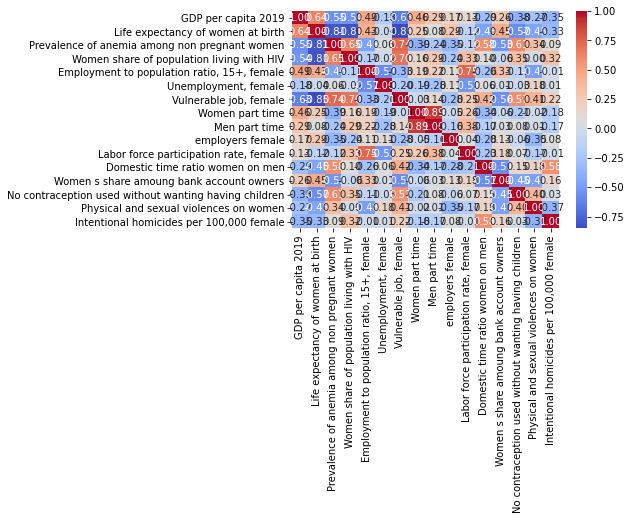

In [36]:
sns.heatmap(df_final.corr(), cmap='coolwarm', annot=True, fmt=".2f")